In [1]:
import numpy as np
import dense_basis as db
import matplotlib.pyplot as plt
from astropy.table import Table
import time

print('using versions:')
print('numpy: ',np.__version__)
print('dense basis: ',db.__version__)

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.
using versions:
numpy:  1.16.4
dense basis:  0.1.8


In [2]:
db.set_plot_style()

In [3]:
bagpipes_fits = Table.read('bagpipes_test_v1.fits')
bagpipes_fits

#ID,delayed:age_16,delayed:age_50,delayed:age_84,delayed:massformed_16,delayed:massformed_50,delayed:massformed_84,delayed:metallicity_16,delayed:metallicity_50,delayed:metallicity_84,delayed:tau_16,delayed:tau_50,delayed:tau_84,dust:Av_16,dust:Av_50,dust:Av_84,redshift_16,redshift_50,redshift_84,stellar_mass_16,stellar_mass_50,stellar_mass_84,formed_mass_16,formed_mass_50,formed_mass_84,sfr_16,sfr_50,sfr_84,ssfr_16,ssfr_50,ssfr_84,nsfr_16,nsfr_50,nsfr_84,mass_weighted_age_16,mass_weighted_age_50,mass_weighted_age_84,tform_16,tform_50,tform_84,tquench_16,tquench_50,tquench_84,UV_colour_16,UV_colour_50,UV_colour_84,VJ_colour_16,VJ_colour_50,VJ_colour_84,input_redshift,log_evidence,log_evidence_err,chisq_phot,n_bands
bytes2,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,2.1225956358634313,2.9986456797309238,3.7709821572409368,11.20260997165424,11.302400541491533,11.374177628745448,0.2293627709981146,0.3964514165603595,0.6882458000400389,0.37479638845739366,0.6778234875188414,1.3380393430374913,0.08864852474115739,0.2916834581436981,0.7461947489626419,1.405045907045617,1.503987545131857,1.639116520875838,10.95720733455767,11.045425821672222,11.113572465959997,11.20260997165424,11.302400541491533,11.374177628745448,4.305182312791078,13.794929820574424,47.83407155699452,-10.393553043224552,-9.94143417436421,-9.355127556267805,-1.0203651205283832,-0.5740026332608767,0.02703030764069288,1.3002242310371959,1.7588219992551215,2.346112693798969,1.8643450931607595,2.3345288646757387,2.850117881809762,4.3786124508050825,99.0,99.0,2.1419062836957057,2.486817322905437,3.073449826535977,0.39599748949326496,0.46332265873305545,0.5792115202001923,0.0,497.22267014177055,0.18609580716081106,0.8160203635612552,12.0
2,1.7656316009387933,2.5432191217178035,3.645998479855124,9.533353276646428,9.605013965410784,9.679257427534438,1.0193064803614234,1.2807482185558867,1.5463822521199833,0.31707370022215386,0.5886761374148921,1.1057897738578397,0.024981259689809784,0.09381969898109743,0.25703062652222075,1.3751523189753536,1.4230021716670855,1.4713004153648077,9.30460489787283,9.366520022839607,9.426632195391916,9.533353276646428,9.605013965410784,9.679257427534438,0.25964615689670356,0.4400315629514716,0.6542052651719864,-9.946316550111646,-9.755838842050903,-9.558148863341547,-0.5306809283732699,-0.35999760583283447,-0.15477984296205508,1.140936029592427,1.5135442189217287,2.004716282061366,2.3318311908466707,2.885219966904991,3.323132053017374,99.0,99.0,99.0,1.6820704968333364,1.9222076844268599,2.340130111153386,0.47576770572617966,0.5272395611485123,0.5886688776696579,0.0,540.1476375879658,0.2021269418411122,3.5850413396647007,12.0
3,2.2816306555865045,3.033711571728349,3.8155047667212685,10.877207647703322,10.960975841240078,11.02592672822465,0.6024869542591859,1.206730004579192,1.7920386108304434,0.16557841631246145,0.2791000149086739,0.4459738502587438,0.1124047341556219,0.3571473574551416,0.765360795712259,1.439899115211702,1.4878467854524522,1.5381174780439641,10.619044837638066,10.687908766619564,10.74338332744196,10.877207647703322,10.960975841240078,11.02592672822465,0.0013191535579282676,0.1289071552277567,0.981860007251856,-13.599683234052092,-11.537897425744115,-10.689611917738254,-4.25317662141428,-2.170623172403012,-1.3274590808539564,1.8290970454241524,2.4093329744484455,3.0438931320518106,1.184224162909616,1.8144144280288788,2.420346583314518,2.3957062527414195,3.2266851295267447,3.771382207575257,4.012353794578398,4.913159883281644,5.496446364057936,0.9809309247172562,1.028819390419459,1.086454725165679,0.0,514.7817596983699,0.1861384726786955,0.393334491044357

In [4]:
#db_fits = Table.read('db_fits_v2.fits')
db_fits = Table.read('db_fits_v2_snr_100.fits')
#db_fits = Table.read('db_fits_v2_snr_300.fits')
db_fits

mstar_50,mstar_16,mstar_84,sfr_50,sfr_16,sfr_84,redshift_50,redshift_16,redshift_84
float64,float64,float64,float64,float64,float64,float64,float64,float64
11.152500000002389,11.09650000000237,11.15650000000239,-1.7734999999985885,-3.931499999999309,0.740500000002251,1.68950437816908,1.6855043781690804,1.7325043781690752
9.583500000001864,9.574500000001862,9.59950000000187,-2.160499999998718,-3.1844999999990597,-0.8294999999982733,1.6925043781690796,1.6875043781690802,1.7835043781690696
10.76650000000226,10.762500000002259,10.840500000002285,-1.0254999999983387,-4.95349999999965,-1.0124999999983344,1.797504378169068,1.7865043781690693,1.798504378169068
10.511500000002174,10.508500000002174,10.519500000002177,-1.7774999999985899,-1.7814999999985912,-1.2284999999984065,1.7635043781690718,1.7605043781690721,1.8125043781690664
10.779500000002264,10.778500000002264,10.784500000002266,-0.373499999998121,-1.3654999999984523,-0.37149999999812033,1.7855043781690694,1.7655043781690716,1.789504378169069
10.536500000002183,10.495500000002169,10.537500000002185,-1.0964999999983625,-1.1034999999983648,-0.6014999999981971,1.7325043781690752,1.7315043781690753,1.806504378169067
10.492500000002169,10.487500000002166,10.52850000000218,-1.3004999999984306,-1.7994999999985972,-1.2874999999984262,1.797504378169068,1.7595043781690722,1.798504378169068
10.85850000000229,10.85850000000229,10.85950000000229,-0.22849999999807258,-0.22849999999807258,-0.21849999999806924,1.806504378169067,1.806504378169067,1.807504378169067
10.092500000002035,10.028500000002014,10.093500000002036,-0.9884999999983264,-1.3664999999984526,-0.984499999998325,1.806504378169067,1.7585043781690723,1.807504378169067


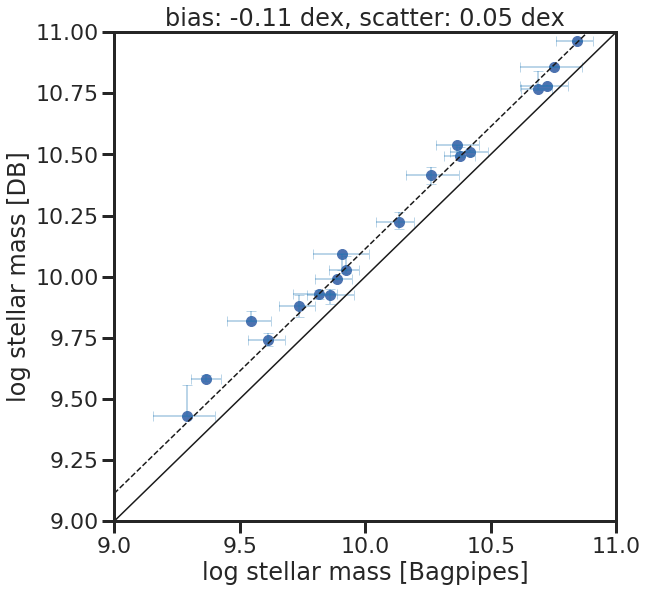

In [5]:

plt.figure(figsize=(9,9))

xdata = bagpipes_fits['stellar_mass_50']
xerr_lo = bagpipes_fits['stellar_mass_50'] - bagpipes_fits['stellar_mass_16']
xerr_hi = bagpipes_fits['stellar_mass_84'] - bagpipes_fits['stellar_mass_50']
ydata = db_fits['mstar_50']
yerr_lo = db_fits['mstar_50'] - db_fits['mstar_16']
yerr_hi = db_fits['mstar_84'] - db_fits['mstar_50']
xlabel_val = 'log stellar mass [Bagpipes]'
ylabel_val = 'log stellar mass [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100)
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([9,11],[9,11],'k-')
plt.plot([9,11],[9-medbias,11-medbias],'k--')
plt.axis([9,11,9,11])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_Bagpipes_mass_comparison.png',bbox_inches='tight')

plt.show()

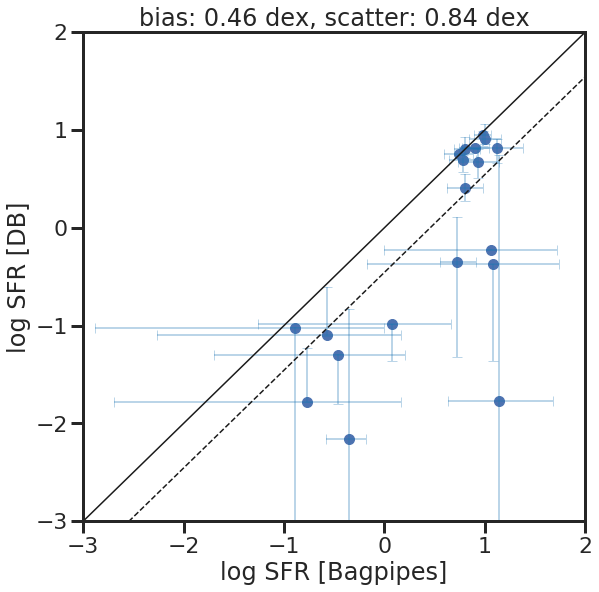

In [6]:

plt.figure(figsize=(9,9))

xdata = np.log10(bagpipes_fits['sfr_50'])
xerr_lo = np.log10(bagpipes_fits['sfr_50']) - np.log10(bagpipes_fits['sfr_16'])
xerr_hi = np.log10(bagpipes_fits['sfr_84']) - np.log10(bagpipes_fits['sfr_50'])
ydata = db_fits['sfr_50']
yerr_lo = db_fits['sfr_50'] - db_fits['sfr_16']
yerr_hi = db_fits['sfr_84'] - db_fits['sfr_50']
xlabel_val = 'log SFR [Bagpipes]'
ylabel_val = 'log SFR [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f dex, scatter: %.2f dex' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100)
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([-3,2],[-3,2],'k-')
plt.plot([-3,2],[-3-medbias,2-medbias],'k--')
plt.axis([-3,2,-3,2])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_Bagpipes_sfr_comparison.png',bbox_inches='tight')

plt.show()

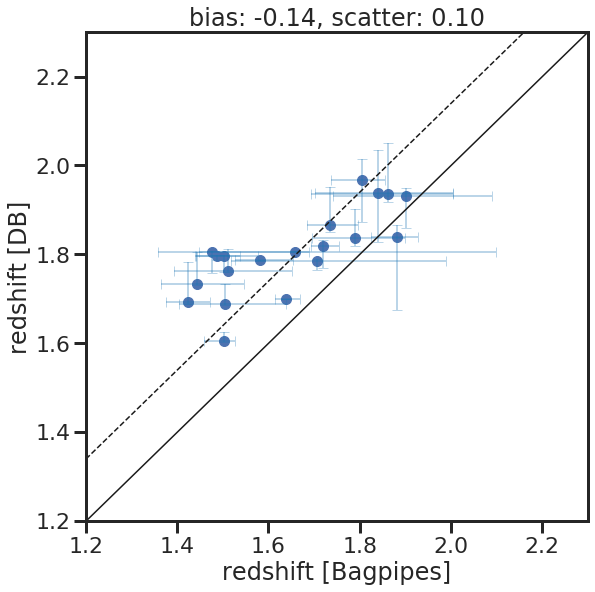

In [7]:

plt.figure(figsize=(9,9))

xdata = bagpipes_fits['redshift_50']
xerr_lo = bagpipes_fits['redshift_50'] - bagpipes_fits['redshift_16']
xerr_hi = bagpipes_fits['redshift_84'] - bagpipes_fits['redshift_50']
ydata = db_fits['redshift_50']
yerr_lo = db_fits['redshift_50'] - db_fits['redshift_16']
yerr_hi = db_fits['redshift_84'] - db_fits['redshift_50']
xlabel_val = 'redshift [Bagpipes]'
ylabel_val = 'redshift [DB]'
medbias = np.nanmedian(xdata-ydata)
medscatter = np.nanstd(xdata-(ydata+medbias))
titlestr = 'bias: %.2f, scatter: %.2f' %(medbias, medscatter)

plt.scatter(xdata,ydata,s=100)
plt.errorbar(xdata,ydata,xerr = (xerr_lo,xerr_hi), yerr = (yerr_lo, yerr_hi),
            lw=0,elinewidth=2,capsize=5,color='tab:blue',alpha=0.3)
plt.plot([1.2,2.3],[1.2,2.3],'k-')
plt.plot([1.2,2.3],[1.2-medbias,2.3-medbias],'k--')
plt.axis([1.2,2.3,1.2,2.3])

plt.xlabel(xlabel_val)
plt.ylabel(ylabel_val)
plt.title(titlestr)

plt.savefig('DB_Bagpipes_redshift_comparison.png',bbox_inches='tight')

plt.show()

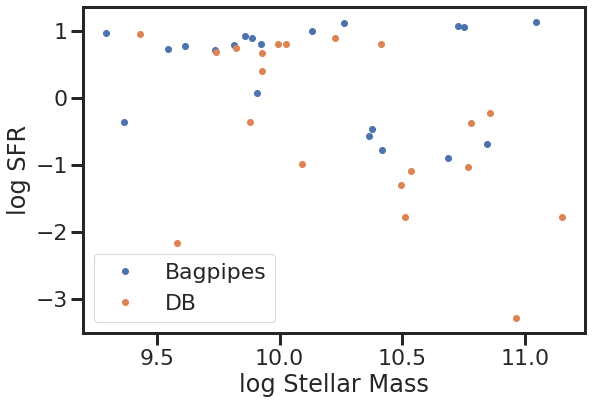

In [11]:
plt.figure(figsize=(9,6))
plt.plot(bagpipes_fits['stellar_mass_50'],np.log10(bagpipes_fits['sfr_50']),'o',label='Bagpipes')
plt.plot(db_fits['mstar_50'],db_fits['sfr_50'],'o',label='DB')
plt.xlabel('log Stellar Mass'); plt.ylabel('log SFR');plt.legend()
plt.show()